 This is an analysis that generates insight from a dataset named "Superstore Sales Dataset". The Superstore Sales Dataset contains data on order details of customers for orders of a superstore in the US. It includes various columns like order date, shipping date, the product ordered, state, region, etc. 

## Import Pandas Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Remove warnings
import warnings
warnings.filterwarnings('ignore')

## Load The Dataset

In [3]:
 #load the dataset into pandas dataframe
df= pd.read_csv("train.csv")        
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
# checking shape of dataset
df.shape

(9800, 18)

## Explore the structure of dataset

### Data Information

In [5]:
# Get information about the dataset, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float


The majority of columns are of **object** data type, indicating categorical or text data. Numeric data types- **int64** and **float64** are present in columns such as **"Row ID," "Postal Code," and "Sales."** Columns include a mix of data types: **int64 (1 column)**, **float64 (2 columns),** and **object** **(15 columns).**

In [6]:
# Display the column names
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')



The dataset comprises with information on orders and customers. Key columns include **'Order ID,'** **'Order Date,'** **'Ship Date,'** **'Ship Mode,'** **'Customer ID,'** and **'Sales'**. Geographical details are captured in columns like **'Country,'** **'City,'** **'State,'** **'Postal Code,'** and **'Region'.**

In [7]:
# Display the number of unique values in each column
print("\nNumber of unique values in each column:")
print(df.nunique())


Number of unique values in each column:
Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64



The uniqueness of values in each column is crucial for determining the diversity and distribution of the data, which can guide further analysis and insights.

## Checking Missing Value

In [8]:
#Checking the missing values
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [9]:
# Filter the DataFrame where postal code is missing
missing_postal_code_df = df[df['Postal Code'].isnull()]
missing_postal_code_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


**After looking at the data, we find that all the 11 missing postal codes belong to orders from city of Burlington and state of Vermont.**

###  Data Filling:
--- Handle missing values, duplicates, and any inconsistencies in the data.

--- Convert data types if necessary

In [10]:
df=df.fillna(52601)
df["Postal Code"]=df["Postal Code"].astype(int)
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

**After a deep study of the postal code in the United States, we decide to replace the missing postal code with 52601, one of the postal code of city Burlington.**

**We also convert the data type of Postal Code into 'int64' for better understanding.**

### Checking Duplicate Value

In [11]:
df.duplicated().sum()

0

**There is no  Duplicate Value in the Dataset**

In [12]:
df=df.drop("Row ID",axis=1)

**I drop Row ID column , this is nothing just serial number. That is consider as non-crucial.**


## 1.Sales Statistics

In [13]:
# Display the summary statistics for the 'Sales' column
sales_stat = df['Sales'].describe()
sales_stat

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

**The average value of the sales is 230.76. The maximum sales amoumt is observed Rs 22638.48.**

In [14]:
df.describe()  # checking summary of dataset

,Postal Code,Sales
count,9800.000000,9800.000000
mean,55270.322857,230.769059
std,32023.359236,626.651875
min,1040.000000,0.444000
25%,23223.000000,17.248000
50%,57551.000000,54.490000
75%,90008.000000,210.605000
max,99301.000000,22638.480000


In [15]:
# Assuming your DataFrame is called df and the date column is 'Order Date', 'Ship Date'
df["Order Date"] = pd.to_datetime(df["Order Date"],  dayfirst=True)
df["Ship Date"] = pd.to_datetime(df["Ship Date"],  dayfirst=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9800 non-null   int32         
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [16]:
df["Month"]=df["Order Date"].dt.month
df["Year"]=df["Order Date"].dt.year

df["MONTH"]=df["Ship Date"].dt.month
df["YEAR"]=df["Ship Date"].dt.year
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year,MONTH,YEAR
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11,2017,11,2017
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11,2017,11,2017
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6,2017,6,2017
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,2016,10,2016
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10,2016,10,2016


In [17]:
df["ShipInDays"]=(df["Ship Date"]-df["Order Date"]).dt.days
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year,MONTH,YEAR,ShipInDays
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11,2017,11,2017,3
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11,2017,11,2017,3
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6,2017,6,2017,4
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,2016,10,2016,7
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10,2016,10,2016,7


# SALES ANALYSIS

### Exploring Sales Distribution Across Region and State and City

In [18]:
#Regionwise Sales Parcentage
data_region_sales=df.groupby("Region")["Sales"].sum().sort_values(ascending=True).reset_index()
data_region_sales

,Region,Sales
0,South,389151.4590
1,Central,492646.9132
2,East,669518.7260
3,West,710219.6845


### Exploring Sales Distribution Across Country and State

In [19]:
#Getting the sales towards each Country and State
state_city_sales=df.groupby(["State","City","Region"])["Sales"].sum().sort_values(ascending=False).apply(int).reset_index()
state_city_sales

,State,City,Region,Sales
0,New York,New York City,East,252462
1,California,Los Angeles,West,173420
2,Washington,Seattle,West,116106
3,California,San Francisco,West,109041
4,Pennsylvania,Philadelphia,East,108841
...,...,...,...,...
595,Florida,Ormond Beach,South,2
596,Florida,Pensacola,South,2
597,Florida,Jupiter,South,2
598,Ohio,Elyria,East,1


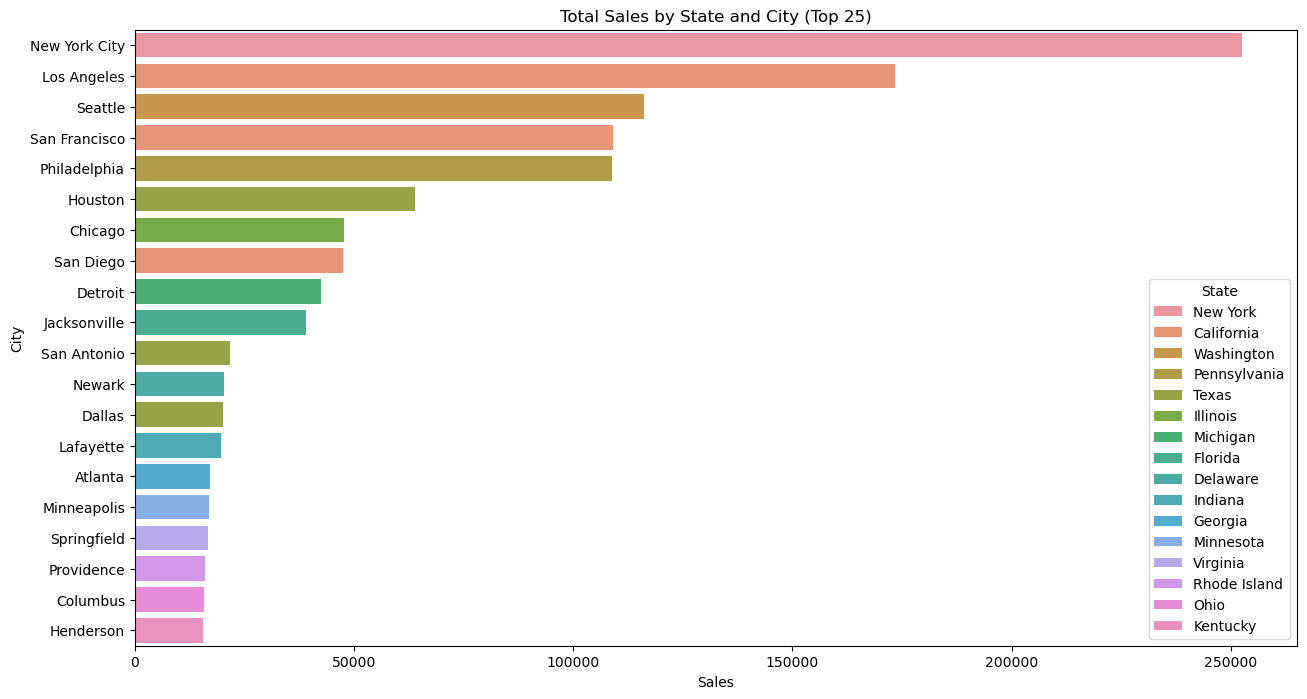

In [20]:
# Create bar plot
plt.figure(figsize=(15, 8))

# Bar plot for total sales by state and city
sns.barplot(data=state_city_sales.head(20), x="Sales", y="City", hue="State", dodge=False)
plt.title("Total Sales by State and City (Top 25)")
plt.xlabel("Sales")
plt.ylabel("City")
plt.legend(title="State")
plt.show()

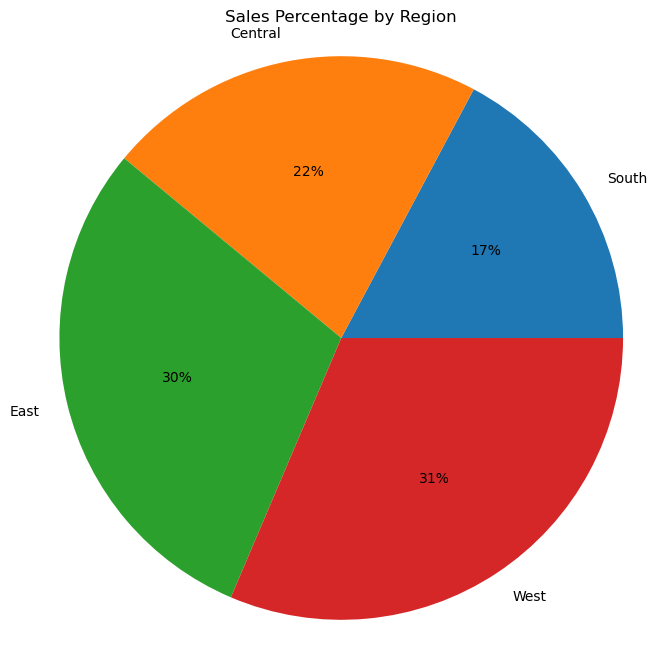

In [21]:
# Create pie chart for sales percentage by region
plt.figure(figsize=(8, 8))

# Calculate total sales across all regions
total_sales = data_region_sales['Sales'].sum()

# Calculate sales percentage for each region
sales_percentage = (data_region_sales['Sales'] / total_sales) * 100

# Plot pie chart
plt.pie(sales_percentage, labels=data_region_sales['Region'], autopct='%1.0f%%')
plt.title('Sales Percentage by Region')
plt.axis('equal')
plt.show()

###### OBSERVATION:

**Scrutinizing the dataset, based on above analysis , it becomes evident that the Western Region stands out with the highest sum of the sales figure of 710219.68. Notably New York city of New York State in East Region, contributing significantly with sales figure of 252462. This East Region is the second highest contributor to overall sales of  669518.72. In contrast Abilene in the Central Region of the Texas state portays lowest sum of sales figures across the dataset. In terms of sales distribution, the Western Region accounted for 31% of total sales, followed by the East Region with 30%. The Central and South Region contributed 22% and 17% to the total sales, respectively.**

### Distribution Of Sales in Shipping Mode

In [22]:
No_Sales_Ship_Mode=df.groupby("Ship Mode")["Sales"].count().sort_values(ascending=False).apply(int).reset_index()
No_Sales_Ship_Mode

,Ship Mode,Sales
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


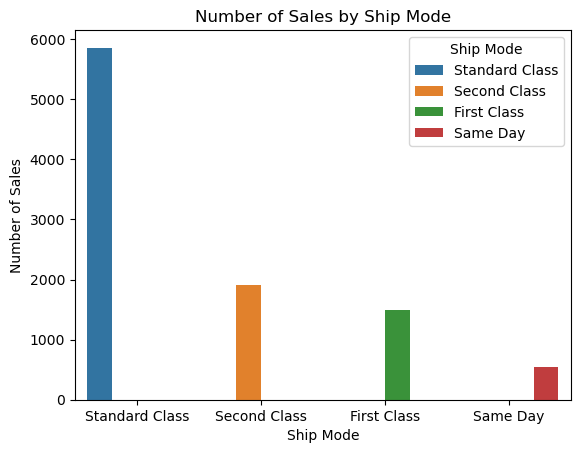

In [23]:
sns.barplot(data=No_Sales_Ship_Mode, x='Ship Mode', y='Sales', hue='Ship Mode')
plt.title('Number of Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Number of Sales')
plt.show()

###### OBSERVATION:
**In the dataset, four ship modes are identified: Standard Class, Second Class, First Class, and Same Day. Among these, Standard Class emerges as the most popular choice, with a maximum observed sales count of 5859. Conversely, Same Day exhibits the lowest sales count, with only 538 transactions recorded.**

### Analysis With Order Quantity

In [24]:
order_quantity = df.groupby('Order ID').size().reset_index(name='Order Quantity')
order_quantity

,Order ID,Order Quantity
0,CA-2015-100006,1
1,CA-2015-100090,2
2,CA-2015-100293,1
3,CA-2015-100328,1
4,CA-2015-100363,2
...,...,...
4917,US-2018-168802,1
4918,US-2018-169320,2
4919,US-2018-169488,2
4920,US-2018-169502,2


In [25]:
# Compute descriptive statistics
order_quantity_stats = order_quantity['Order Quantity'].describe()
print(order_quantity_stats)


count    4922.000000
mean        1.991061
std         1.406115
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        14.000000
Name: Order Quantity, dtype: float64


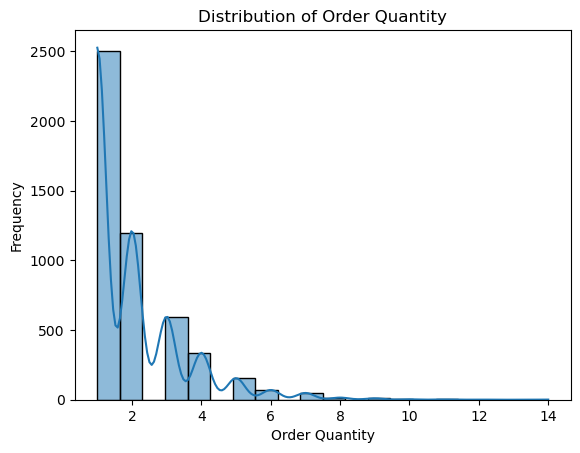

In [26]:
sns.histplot(order_quantity['Order Quantity'], bins=20, kde=True,)
plt.title('Distribution of Order Quantity')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.show()

###### OBSERVATION:

**The above statistics and graph shows the distribution of order quantity which is the number of items ordered in each order.  The x-axis shows the order quantity, and the y-axis shows the frequency of orders with that quantity. The graph shows that most orders are for small quantities, with a peak at around 2-6 items. The distribution is right-skewed, meaning that there are more orders for small quantities than for large quantities. There is a long tail of orders for large quantities. This means that there is a small but non-negligible chance of getting an order for a very large quantity.**

# 2.Customer Segmentation

In [27]:
### Number of Customer in each Segment
Segment_Type = df["Segment"].value_counts().reset_index()
Segment_Type 

,Segment,count
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


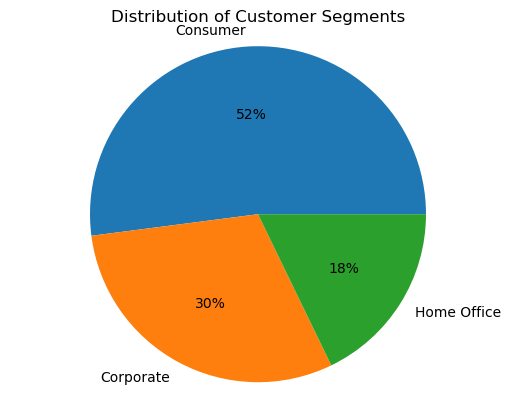

In [28]:
# Define data
segments = Segment_Type['Segment']
counts = Segment_Type['count']

# Create pie chart
plt.pie(counts, labels=segments, autopct='%1.0f%%')
plt.title('Distribution of Customer Segments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

###### OBSERVATION:

**The dataset comprises three segments: 'Consumer', 'Corporate', and 'Home Office', with counts of 5101, 2953, and 1746, respectively. As depicted in the pie chart above, these segments contribute to the overall distribution, with the 'Consumer' segment representing the largest share at 52% of the total. Following closely is the 'Home Office' segment, accounting for 30%, while the 'Corporate' segment constitutes the smallest portion at 18%.**

###  Customer Distribution Accross Region

In [29]:
# Group the data by 'Region' and count the unique customers for each region
customer_count_east = df[df['Region'] == 'East']['Customer ID'].nunique()
customer_count_west = df[df['Region'] == 'West']['Customer ID'].nunique()
customer_count_south = df[df['Region'] == 'South']['Customer ID'].nunique()
customer_count_central = df[df['Region'] == 'Central']['Customer ID'].nunique()

# Display the counts for each region
print("Number of customers in the East region:", customer_count_east)
print("Number of customers in the West region:", customer_count_west)
print("Number of customers in the South region:", customer_count_south)
print("Number of customers in the Central region:", customer_count_central)


Number of customers in the East region: 669
Number of customers in the West region: 681
Number of customers in the South region: 509
Number of customers in the Central region: 626


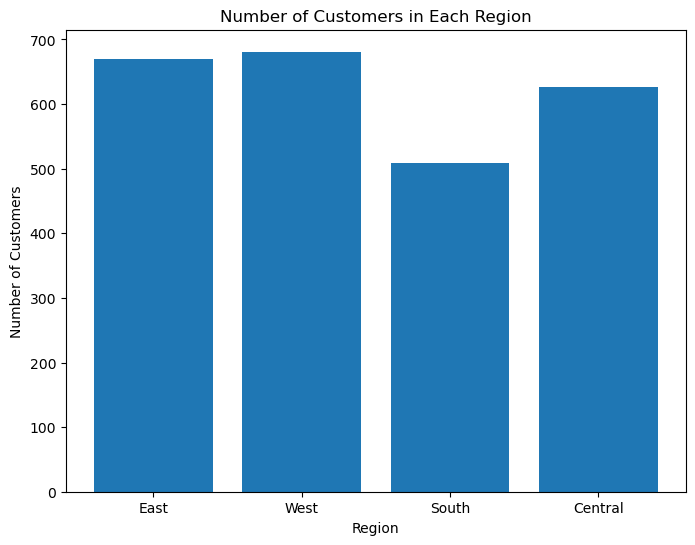

In [30]:
#plot in bar
# Define the regions and their corresponding customer counts
regions = ['East', 'West', 'South', 'Central']
customer_counts = [customer_count_east, customer_count_west, customer_count_south, customer_count_central]

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(regions, customer_counts)
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Region')
plt.show()

###### OBSERVATION:
**Based on the graph, the "West" region has the most customers.**

### Ranking of customers accordng to higest sales

In [31]:
df.groupby(['Customer Name', 'City','State','Region','Category','Sub-Category'])['Sales'].sum().sort_values(ascending =False).reset_index().head(10)

,Customer Name,City,State,Region,Category,Sub-Category,Sales
0,Sean Miller,Jacksonville,Florida,South,Technology,Machines,23459.780
1,Tamara Chand,Lafayette,Indiana,Central,Technology,Copiers,17499.950
2,Raymond Buch,Seattle,Washington,West,Technology,Copiers,13999.960
3,Tom Ashbrook,New York City,New York,East,Technology,Copiers,11199.968
4,Hunter Lopez,Newark,Delaware,East,Technology,Copiers,10499.970
5,Adrian Barton,Detroit,Michigan,Central,Office Supplies,Binders,9892.740
6,Sanjit Chand,Minneapolis,Minnesota,Central,Office Supplies,Binders,9462.890
7,Bill Shonely,Lakewood,New Jersey,East,Technology,Machines,9099.930
8,Sanjit Engle,Arlington,Virginia,South,Technology,Machines,8749.950
9,Christopher Conant,Philadelphia,Pennsylvania,East,Technology,Copiers,8399.976


###### OBSERVATION:

**Based on the analysis, the West region boasts the highest number of customers, totaling 681, followed by the East region with 669 customers, the Central region with 626 customers, and the South region with 509 customers. Notably, Sean Miller from Jacksonville, Florida State, holds the record for the highest individual purchase value within the South region. In the Central, West, and East regions, the top individual purchase values are held by Tamara Chand, Raymond Buch, and Tom Ashbrook, respectively.** 

# 3.Product Analysis

### Exploring Sales Distribution Across Sub-Categories Within Specific Categories

In [32]:
#Getting the sales towards each sub category which belongs to a specific category

df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()

,Category,Sub-Category,Sales
0,Furniture,Bookcases,113813.1987
1,Furniture,Chairs,322822.7310
2,Furniture,Furnishings,89212.0180
3,Furniture,Tables,202810.6280
4,Office Supplies,Appliances,104618.4030
5,Office Supplies,Art,26705.4100
6,Office Supplies,Binders,200028.7850
7,Office Supplies,Envelopes,16128.0460
8,Office Supplies,Fasteners,3001.9600
9,Office Supplies,Labels,12347.7260


# Most Category Sold

In [33]:
category_sold=df.groupby('Category')['Sales'].sum().sort_values(ascending=True).reset_index()
category_sold

,Category,Sales
0,Office Supplies,705422.3340
1,Furniture,728658.5757
2,Technology,827455.8730


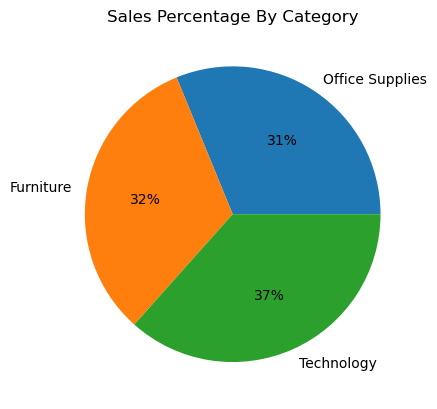

In [34]:
# Calculate Total Sales across all categories
total_cat_sales = category_sold['Sales'].sum()

# Calculate Sales Percentage in each category
category_sold['Sales_percentage'] = (category_sold['Sales'] / total_cat_sales) * 100

# Create Pie Chart
plt.pie(category_sold['Sales_percentage'], labels=category_sold['Category'], autopct='%1.0f%%')
plt.title('Sales Percentage By Category')
plt.show()


###### OBSERVATION:

**The demand of technology category is more than others.**

# Most Subcategory Sold

In [35]:
# Number of Sub-categories products are divided.
Sub_Category_Num = df['Sub-Category'].nunique()
# Number of products in each sub-category
sub_count = df['Sub-Category'].value_counts().reset_index()
print('There are', Sub_Category_Num, 'Sub Categories products:')
print(sub_count)

There are 17 Sub Categories products:
   Sub-Category  count
0       Binders   1492
1         Paper   1338
2   Furnishings    931
3        Phones    876
4       Storage    832
5           Art    785
6   Accessories    756
7        Chairs    607
8    Appliances    459
9        Labels    357
10       Tables    314
11    Envelopes    248
12    Bookcases    226
13    Fasteners    214
14     Supplies    184
15     Machines    115
16      Copiers     66


In [36]:
sub_cat_sold=df.groupby(['Sub-Category', 'Category'])['Sales'].sum().sort_values(ascending=False).reset_index()
sub_cat_sold

,Sub-Category,Category,Sales
0,Phones,Technology,327782.4480
1,Chairs,Furniture,322822.7310
2,Storage,Office Supplies,219343.3920
3,Tables,Furniture,202810.6280
4,Binders,Office Supplies,200028.7850
5,Machines,Technology,189238.6310
6,Accessories,Technology,164186.7000
7,Copiers,Technology,146248.0940
8,Bookcases,Furniture,113813.1987
9,Appliances,Office Supplies,104618.4030


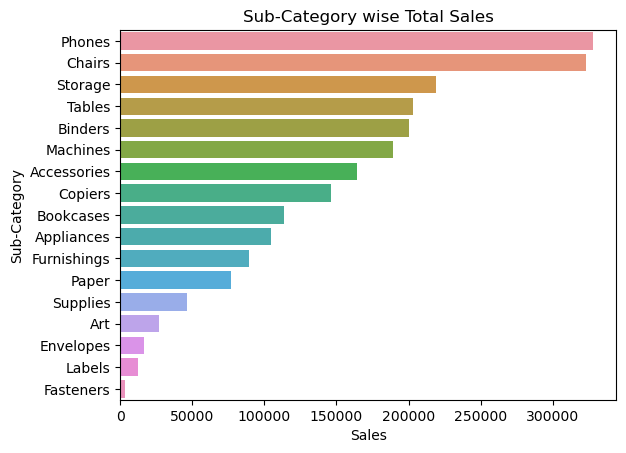

In [37]:
sns.barplot(y=sub_cat_sold["Sub-Category"], x=sub_cat_sold["Sales"])
plt.xlabel("Sales")
plt.ylabel("Sub-Category")
plt.title("Sub-Category wise Total Sales")
plt.show()

###### OBSERVATION:
**From the above analysis it is clear that  the three main categories (Technology, Furniture, and Office Supplies), Technology products are the top-selling category, led by Phones. Office Supplies follow closely behind, with Binders being the highest-selling sub-category within that group. Furniture sales are also significant but generally lower compared to Technology and Office Supplies. Fasteners have the lowest sales among all categories and sub-categories, indicating lower demand for this type of product.**


# The most product sold

In [38]:
Top_Product = df.groupby(["Product Name","Category","Sub-Category"])["Sales"].sum().sort_values(ascending=False).reset_index().head(20)
Top_Product.head()

,Product Name,Category,Sub-Category,Sales
0,Canon imageCLASS 2200 Advanced Copier,Technology,Copiers,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,Office Supplies,Binders,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,Technology,Machines,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,Furniture,Chairs,21870.576
4,GBC DocuBind TL300 Electric Binding System,Office Supplies,Binders,19823.479


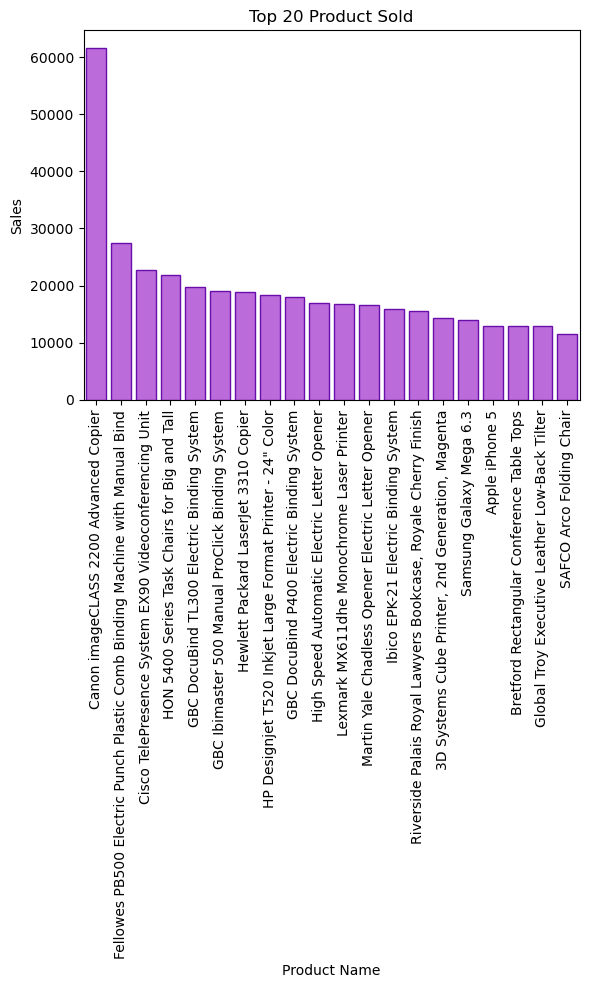

In [39]:
sns.barplot(x=Top_Product["Product Name"], y=Top_Product["Sales"], color= "#C45AEC", edgecolor="#6A0DAD")
plt.xlabel("Product Name")
plt.ylabel("Sales")
plt.title("Top 20 Product Sold")
plt.xticks(rotation =90)
plt.show()

###### OBSERVATION:
**The analysis highlights the dominance of the Technology category over others, with total sales amounting to 827455.87, compared to 705422.33 for Office Supplies and 728658.57 for Furniture. This equates to Technology comprising 37% of total sales, while Office Supplies and Furniture represent 31% and 32%, respectively. Within the Technology category, Phones emerge as the top-selling sub-category, generating 327782.44 in sales. Notably, the Canon imageCLASS 2200 Advanced Copier stands out within the Copiers sub-category, contributing significantly with sales totaling 61,599.82.**

# Identifying the Most Popular Category, Sub-Category, and Product Name Across Regions"

In [40]:
# Group the data by Region, Product Name, and calculate the total sales
region_product_sales = df.groupby(['Region', 'Product Name'])['Sales'].sum().reset_index()

# Find the product with the highest total sales in each region
most_demandable_products = region_product_sales.loc[region_product_sales.groupby('Region')['Sales'].idxmax()]

# Display the result
print(most_demandable_products)


       Region                                       Product Name      Sales
283   Central              Canon imageCLASS 2200 Advanced Copier  17499.950
1592     East              Canon imageCLASS 2200 Advanced Copier  30099.914
2938    South  Cisco TelePresence System EX90 Videoconferenci...  22638.480
4045     West              Canon imageCLASS 2200 Advanced Copier  13999.960


######  OBSERVATION:
**It clear from the analysis of the dataset Canon imageCLASS 2200 Advanced Copier is most demandable in Central Region, East Region, West Region and Cisco TelePresence System EX90 is demandable in South Region.**

# 4.Time Series Analysis

### TOTAL SALES PER YEAR

In [41]:
Total_Sales_Per_Year = df.groupby("YEAR")["Sales"].sum().sort_values(ascending=False).apply(int).reset_index()
Total_Sales_Per_Year

,YEAR,Sales
0,2018,719726
1,2017,602306
2,2016,467302
3,2015,467041
4,2019,5159


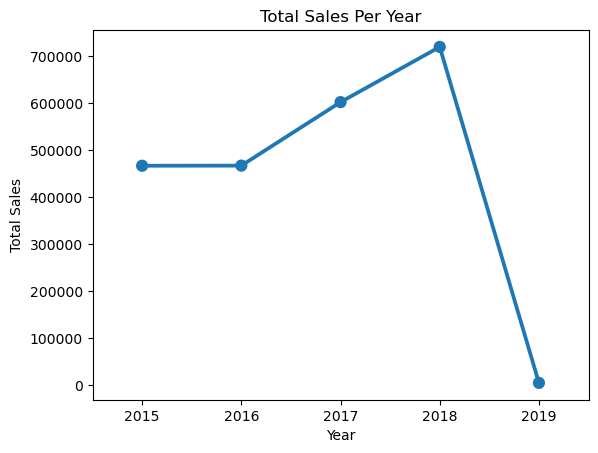

In [42]:
# Plot the point plot
sns.pointplot(data=Total_Sales_Per_Year, x='YEAR', y='Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales Per Year')
plt.show()

###### OBSERVATION:

**The analysis reveals that the highest total sales were recorded in 2018, amounting to 719,726. Conversely, the lowest total sales were observed in 2019, totaling 5,159. This significant disparity underscores the fluctuating sales performance over the years, with 2018 standing out as the most lucrative period and 2019 experiencing notably lower sales figures.**

### Average Order By Month and Year

In [43]:
monthly_average_order=df.groupby(["Month","Year"])["Sales"].mean().sort_values(ascending=False).apply(int).reset_index()
monthly_average_order.head()

,Month,Year,Sales
0,3,2015,358
1,3,2017,317
2,1,2016,316
3,10,2017,310
4,9,2015,305


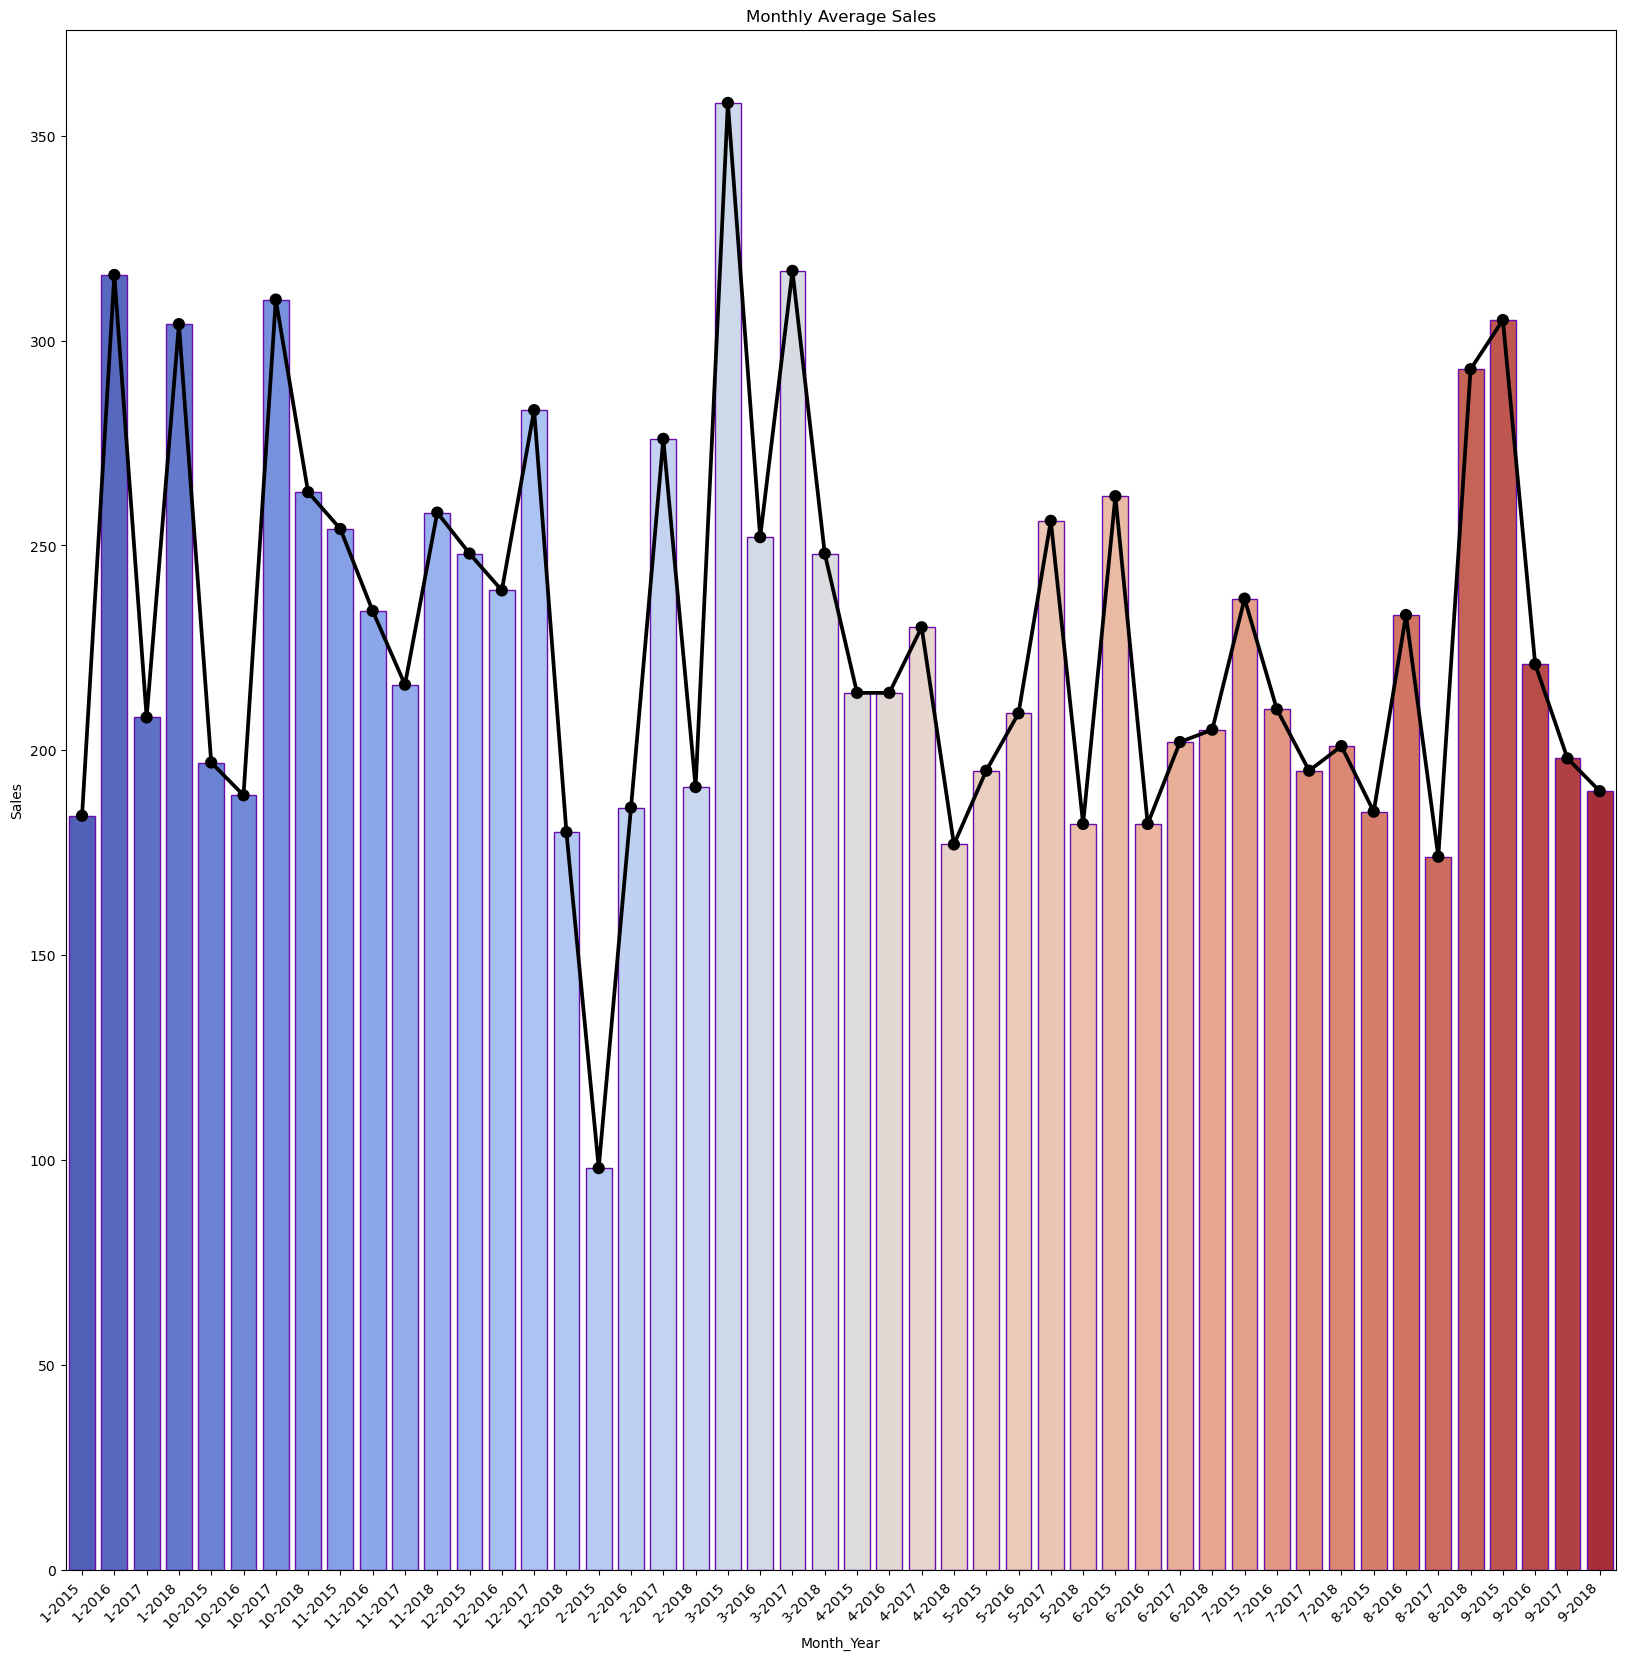

In [44]:
# Concatenate 'Month' and 'Year' columns into a new column 'Month_Year'
monthly_average_order['Month_Year'] = monthly_average_order['Month'].astype(str) + '-' + monthly_average_order['Year'].astype(str)

# Sort the DataFrame by 'Month_Year' column in ascending order
monthly_average_order = monthly_average_order.sort_values(by='Month_Year')

# Plot the bar plot with sorted order
plt.figure(figsize=(20,20))
sns.barplot(data=monthly_average_order, x='Month_Year', y='Sales', 
            palette='coolwarm', edgecolor="#6A0DAD")
plt.title('Monthly Average Sales')
plt.xlabel('Month-Year')
plt.ylabel('Average Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Plot the point plot
sns.pointplot(data=monthly_average_order, x='Month_Year', y='Sales',color="Black")

plt.show()



###### OBSERVATION:

**The above analysis  of the dataset showcases the average order value over different months and years. It reveals that the average order value fluctuates across various time periods. For instance, there are peaks in March 2015 and January 2016, while February 2015 exhibits the lowest average order value. These fluctuations suggest potential seasonal trends or changes in consumer behavior that businesses can analyze to optimize their sales strategies and enhance customer satisfaction.**

### Analysis of seasonal average sale: 

In [45]:
# Define a function to get the season based on the month
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the function to create a new column 'Season' in the DataFrame
df['Season'] = df['MONTH'].apply(get_season)

# Display the DataFrame to verify the changes
print(df.head())


         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   ...         Category Sub-Category  \
0  ...        Furniture    Bookcases   
1  ...        Furniture       

In [46]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Month,Year,MONTH,YEAR,ShipInDays,Season
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11,2017,11,2017,3,Autumn
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11,2017,11,2017,3,Autumn
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6,2017,6,2017,4,Summer
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,2016,10,2016,7,Autumn
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10,2016,10,2016,7,Autumn


In [47]:
# Group the data by 'Season' and calculate the average sales for each season
seasonal_average_sales = df.groupby('Season')['Sales'].mean().reset_index()
seasonal_average_sales

,Season,Sales
0,Autumn,232.837554
1,Spring,237.237212
2,Summer,215.162697
3,Winter,236.682281


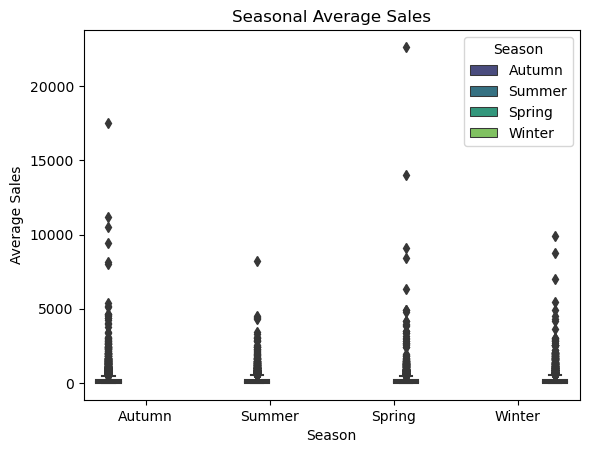

In [48]:
# Create a KDE plot for seasonal average sales
sns.boxplot(x='Season', y='Sales', data=df, hue='Season', palette='viridis')
plt.xlabel('Season')
plt.ylabel('Average Sales')
plt.title('Seasonal Average Sales')
plt.show()

###### OBSERVATION:

**During the analysis of sales figures across different seasons, it was found that spring stands out with the highest average sales figure of 237.24. Conversely, the summer season exhibits the lowest average sales figure of 215.16. Overall, these observations highlight the seasonal variations in sales performance, with spring being the most lucrative period and summer experiencing relatively subdued sales levels.**

### Maximum Shipping Day

In [49]:
time_taken=df["ShipInDays"].value_counts().sort_values(ascending=False).reset_index()
time_taken

,ShipInDays,count
0,4,2718
1,5,2147
2,2,1295
3,6,1170
4,3,978
5,7,615
6,0,514
7,1,363


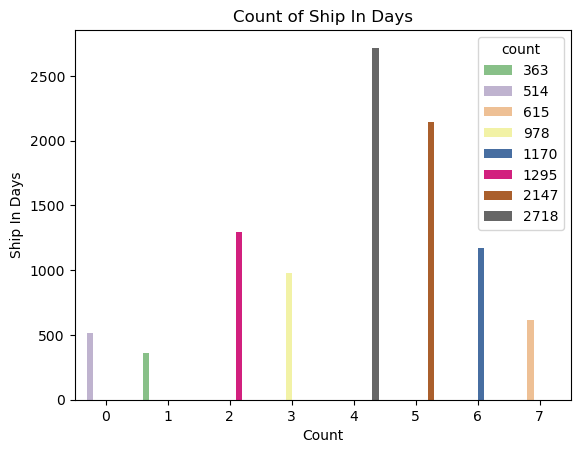

In [50]:
sns.barplot(x=time_taken['ShipInDays'], y=time_taken['count'], hue='count', data=time_taken, palette="Accent")
plt.title('Count of Ship In Days')
plt.xlabel('Count')
plt.ylabel('Ship In Days')
plt.show()

###### OBSERVATION:

**The data reveals that most shipments arrive within 4 to 5 days, with a peak at 4 days (2718 shipments) followed by 5 days (2147 shipments). However, there is some variability, with shipments ranging from 0 to 7 days. Overall, the majority of shipments are delivered promptly within a week, indicating efficient shipping processes.**

## Conclusion:

**In conclusion, the analysis of the dataset provides valuable insights into various aspects of the business operations, including sales performance, customer segmentation, product categories, shipping efficiency, and seasonal trends.**

**Key findings include:**

- **The Western Region emerges as the top contributor to sales, with notable contributions from New York City in the East Region.**

- **Standard Class is the preferred shipping mode, while Same Day has the lowest sales count.**

- **Most orders consist of small quantities, indicating a preference for smaller purchases.**

- **The Consumer segment dominates the customer base, followed by Home Office and Corporate segments.**

- **Technology products lead in sales, particularly Phones and Copiers, while Fasteners have the lowest sales.**

- **Sales performance fluctuates across different years and seasons, with notable peaks and lows.**

- **Spring emerges as the most lucrative season for sales, while summer exhibits relatively subdued sales levels.**

- **Shipping processes generally ensure prompt delivery within a week, with slight variability in delivery times.**

**Overall, these insights can guide strategic decision-making, helping businesses optimize their operations, target marketing efforts, and enhance customer satisfaction to drive continued success in the competitive marketplace.**

